In [1]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy.interpolate import interp1d

In [3]:
def read_data(filename, n_skip):
   
    wavelength = []
    transmissivity = []

    with open(filename, "r") as file:
        lines = file.readlines()[n_skip:]
        for line in lines:
            words = line.split()
            #print(words[0], ' ; ', words[1])    
            wavelength.append(float(words[0]))
            transmissivity.append(float(words[1]))
                
    return wavelength, transmissivity

In [4]:
wl_cherenkov, transmissivity = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/qe_lst2-4_20200318_highandlow.dat', 33)

In [5]:
wl_cherenkov[1]

330.0

In [6]:
def get_eff(wl_cherenkov, transmissivity, wl_filter, transmissivity_filter, wl_sipm, pde_sipm, int_range):
    
    wl_points = np.arange(int_range[0],int_range[1],1)
    
    f_cherenkov = interp1d(wl_cherenkov, transmissivity, kind='cubic')
    f_pde = interp1d(wl_sipm, pde_sipm, kind='cubic')
    f_filter = interp1d(wl_filter, transmissivity_filter, kind='cubic')
    
    cherenkov_sum = np.sum(f_cherenkov(wl_points))
    f_cherenkov_norm = interp1d(wl_cherenkov, transmissivity/cherenkov_sum, kind='cubic')

    integral = 0.

    for i_point in range(len(f_cherenkov(wl_points))-1):
    
        integral = integral + f_cherenkov_norm(wl_points[i_point])*f_pde(wl_points[i_point])*f_filter(wl_points[i_point])*(wl_cherenkov[i_point+1]-wl_cherenkov[i_point])
        #integral = integral + f_cherenkov(wl_points[i_point])*1.
    
    #integral = integral/(cherenkov_sum)
    return integral, f_cherenkov, f_pde
    

In [7]:
def get_pmt_eff(wl_cherenkov, transmissivity, wl_filter, transmissivity_filter, wl_sipm, pde_sipm):
    
    wl_points = np.arange(300,1000,1)
    
    f_cherenkov = interp1d(wl_cherenkov, transmissivity, kind='cubic')
    f_pde = interp1d(wl_sipm, pde_sipm, kind='cubic')
    f_filter = interp1d(wl_filter, transmissivity_filter, kind='cubic')
    
    cherenkov_sum = np.sum(f_cherenkov(wl_points))
    print(cherenkov_sum)
    
    wl_points = np.arange(300,800,1)
    f_cherenkov_norm = interp1d(wl_cherenkov, transmissivity/cherenkov_sum, kind='cubic')

    integral = 0.

    for i_point in range(len(f_cherenkov(wl_points))-1):
    
        integral = integral + f_cherenkov_norm(wl_points[i_point])*f_pde(wl_points[i_point])*f_filter(wl_points[i_point])*(wl_cherenkov[i_point+1]-wl_cherenkov[i_point])
        #integral = integral + f_cherenkov(wl_points[i_point])*1.
    
    #integral = integral/(cherenkov_sum)
    return integral, f_cherenkov, f_pde
    

In [8]:
def get_pmt_eff(wl_cherenkov, transmissivity, wl_filter, transmissivity_filter, wl_sipm, pde_sipm):
    
    wl_points = np.arange(300,1000,1)
    
    f_cherenkov = interp1d(wl_cherenkov, transmissivity, kind='cubic')
    f_pde = interp1d(wl_sipm, pde_sipm, kind='cubic')
    f_filter = interp1d(wl_filter, transmissivity_filter, kind='cubic')
    
    cherenkov_sum = np.sum(f_cherenkov(wl_points))
    print(cherenkov_sum)
    
    wl_points = np.arange(300,800,1)
    f_cherenkov_norm = interp1d(wl_cherenkov, transmissivity/cherenkov_sum, kind='cubic')

    integral = 0.

    for i_point in range(len(f_cherenkov(wl_points))-1):
    
        integral = integral + f_cherenkov_norm(wl_points[i_point])*f_pde(wl_points[i_point])*f_filter(wl_points[i_point])*(wl_cherenkov[i_point+1]-wl_cherenkov[i_point])
        #integral = integral + f_cherenkov(wl_points[i_point])*1.
    
    #integral = integral/(cherenkov_sum)
    return integral, f_cherenkov, f_pde
    

In [9]:
int_range = (300, 1000)

In [10]:
wl_cherenkov, transmissivity = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/Spectra_Ch_300-600.txt', 3)
wl_pmma, pmma = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/transmission_lst_window_No7-10_ave.dat', 6)
wl_borofloat, borofloat = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/Borofloat_2ndwdw_SST1M.dat', 4)

wl_nsb, nsb = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/Spectra_NSB_ref.txt', 4)
wl_fbk_25, pde_fbk_25 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_NUVHD_5.74V_Pxt_25.dat', 2)
wl_hkb_25, pde_hkb_25 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_dV_9.0V_Pxt_25_LCT5.dat', 2)

wl_fbk_15, pde_fbk_15 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_NUVHD_3.90V_Pxt_15.dat', 2)
wl_hkb_15, pde_hkb_15 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_dV_7.0V_Pxt_15_LCT5.dat', 2)

wl_hkb_15_nuv, pde_hkb_15_nuv = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_6V_LCT5NUV.dat', 3)
wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_6V_LCT5NUV_NIR.dat', 3)

wl_fbk_8, pde_fbk_8 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_NUVHD_2.35V_Pxt_8.dat', 2)
wl_hkb_8, pde_hkb_8 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/qe_LCT5_4.4V.dat', 2)

wl_hkb_5, pde_hkb_5 = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/PDE_dV_2.6V_Pxt_5_LCT5.dat', 2)
wl_pmt, qe_pmt = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/qe_lst2-4_20200318_highandlow.dat', 14)

In [11]:
wl_hkb_75_new, pde_hkb_75_new = read_data('/home/andrii/work/sim_telarray/analysis/spectrums/hama_proto_pde.dat', 2)

In [12]:
reflectivity = 0.92284
funnel = 0.885447
ff = 0.91939

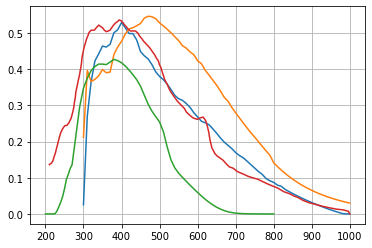

In [13]:
plt.plot(wl_fbk_25, pde_fbk_25)
plt.plot(wl_hkb_25, pde_hkb_25)
#plt.plot(wl_fbk_15, pde_fbk_15)
plt.plot(wl_pmt, qe_pmt)
plt.plot(wl_hkb_75_new, pde_hkb_75_new)
plt.grid()

In [53]:
i_fbk_borofloat_25, f_cherenkov, f_fbk_borofloat_25 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_fbk_25, pde_fbk_25, int_range)
i_hkb_borofloat_25, f_cherenkov, f_hkb_borofloat_25 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_25, pde_hkb_25, int_range)

In [14]:
i_fbk_borofloat_15, f_cherenkov, f_fbk_borofloat_15 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_fbk_15, pde_fbk_15, int_range)
i_hkb_borofloat_15, f_cherenkov, f_hkb_borofloat_15 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_15, pde_hkb_15, int_range)

In [112]:
i_hkb_nuv_borofloat_15, f_cherenkov, f_hkb_nuv_borofloat_15 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_15_nuv, pde_hkb_15_nuv, int_range)
i_hkb_nuv_nir_borofloat_15, f_cherenkov, f_hkb_nuv_nir_borofloat_15 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir, int_range)

In [15]:
i_fbk_borofloat_8, f_cherenkov, f_fbk_borofloat_8 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_fbk_8, pde_fbk_8, int_range)
i_hkb_borofloat_8, f_cherenkov, f_hkb_borofloat_8 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_8, pde_hkb_8, int_range)

In [16]:
i_hkb_borofloat_5, f_cherenkov, f_hkb_borofloat_5 = get_eff(wl_cherenkov, transmissivity, wl_borofloat, borofloat, wl_hkb_5, pde_hkb_5, int_range)

In [54]:
i_fbk_pmma_25, f_cherenkov, f_fbk_pmma_25 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_fbk_25, pde_fbk_25, int_range)
i_hkb_pmma_25, f_cherenkov, f_hkb_pmma_25 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_25, pde_hkb_25, int_range)

In [18]:
i_fbk_pmma_15, f_cherenkov, f_fbk_pmma_15 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_fbk_15, pde_fbk_15, int_range)
i_hkb_pmma_15, f_cherenkov, f_hkb_pmma_15 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_15, pde_hkb_15, int_range)

In [113]:
i_hkb_nuv_pmma_15, f_cherenkov, f_hkb_nuv_pmma_15 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_15_nuv, pde_hkb_15_nuv, int_range)
i_hkb_nuv_nir_pmma_15, f_cherenkov, f_hkb_nuv_nir_pmma_15 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir, int_range)

In [19]:
i_fbk_pmma_8, f_cherenkov, f_fbk_pmma_8 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_fbk_8, pde_fbk_8, int_range)
i_hkb_pmma_8, f_cherenkov, f_hkb_pmma_8 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_8, pde_hkb_8, int_range)

In [20]:
i_hkb_pmma_5, f_cherenkov, f_hkb_pmma_5 = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_5, pde_hkb_5, int_range)

In [110]:
i_pmt_pmma, f_cherenkov, f_pde_pmma = get_pmt_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_pmt, qe_pmt)

149.19178


In [109]:
int_range = (300, 550)

In [31]:
i_hkb_75_pmma, f_cherenkov, f_hkb_75_pmma = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_75_new, pde_hkb_75_new, int_range)

In [55]:
nsb_fbk_borofloat_25, f_nsb_borofloat, f_fbk_borofloat_25 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_fbk_25, pde_fbk_25, int_range)
nsb_hkb_borofloat_25, f_nsb_borofloat, f_hkb_borofloat_25 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_25, pde_hkb_25, int_range)

In [56]:
nsb_fbk_borofloat_15, f_nsb_borofloat, f_fbk_borofloat_15 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_fbk_15, pde_fbk_15, int_range)
nsb_hkb_borofloat_15, f_nsb_borofloat, f_hkb_borofloat_15 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_15, pde_hkb_15, int_range)

In [114]:
nsb_hkb_nuv_borofloat_15, f_nsb_nuv_borofloat, f_hkb_borofloat_15 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_15_nuv, pde_hkb_15_nuv, int_range)
nsb_hkb_nuv_nir_borofloat_15, f_nsb_nuv_nir_borofloat, f_hkb_borofloat_15 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir, int_range)

In [36]:
nsb_fbk_borofloat_8, f_nsb_borofloat, f_fbk_borofloat_8 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_fbk_8, pde_fbk_8, int_range)
nsb_hkb_borofloat_8, f_nsb_borofloat, f_hkb_borofloat_8 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_8, pde_hkb_8, int_range)

In [37]:
nsb_hkb_borofloat_5, f_nsb_borofloat, f_hkb_borofloat_5 = get_eff(wl_nsb, nsb, wl_borofloat, borofloat, wl_hkb_5, pde_hkb_5, int_range)

In [57]:
nsb_fbk_pmma_25, f_nsb_pmma, f_fbk_pmma_25 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_fbk_25, pde_fbk_25, int_range)
nsb_hkb_pmma_25, f_nsb_pmma, f_hkb_pmma_25 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_25, pde_hkb_25, int_range)

In [39]:
nsb_fbk_pmma_15, f_nsb_pmma, f_fbk_pmma_15 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_fbk_15, pde_fbk_15, int_range)
nsb_hkb_pmma_15, f_nsb_pmma, f_hkb_pmma_15 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_15, pde_hkb_15, int_range)

In [115]:
nsb_hkb_nuv_pmma_15, f_nsb_pmma, f_hkb_nuv_pmma_15 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_15_nuv, pde_hkb_15_nuv, int_range)
nsb_hkb_nuv_nir_pmma_15, f_nsb_pmma, f_hkb_nuv_nir_pmma_15 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir, int_range)

In [40]:
nsb_fbk_pmma_8, f_nsb_pmma, f_fbk_pmma_8 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_fbk_8, pde_fbk_8, int_range)
nsb_hkb_pmma_8, f_nsb_pmma, f_hkb_pmma_8 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_8, pde_hkb_8, int_range)

In [41]:
nsb_hkb_pmma_5, f_nsb_pmma, f_hkb_pmma_5 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_5, pde_hkb_5, int_range)

In [107]:
nsb_pmt_pmma, f_nsb_pmma, f_pmt_pmma = get_pmt_eff(wl_nsb, nsb, wl_pmma, pmma, wl_pmt, qe_pmt)

17654.234690000005


In [90]:
reflectivity = 1.
funnel = 1.
ff = 1.

In [44]:
int_range = (300, 1000)
i_hkb_75_pmma, f_cherenkov, f_hkb_75_pmma = get_eff(wl_cherenkov, transmissivity, wl_pmma, pmma, wl_hkb_75_new, pde_hkb_75_new, int_range)
nsb_hkb_pmma_75, f_nsb_pmma, f_hkb_pmma_75 = get_eff(wl_nsb, nsb, wl_pmma, pmma, wl_hkb_75_new, pde_hkb_75_new, (300, 1000))

In [116]:
print('   ==========  LCT5 NUV @ Pxt = 15 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_nuv_borofloat_15, 100.*i_hkb_nuv_pmma_15))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_nuv_borofloat_15, 100.*nsb_hkb_nuv_pmma_15))

print('   ==========  LCT5 NUV NIR @ Pxt = 15 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_nuv_nir_borofloat_15, 100.*i_hkb_nuv_nir_pmma_15))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_nuv_nir_borofloat_15, 100.*nsb_hkb_nuv_nir_pmma_15))

   ==========  LCT5 NUV @ Pxt = 15 %  ==========
Cherenkov : Borofloat : 26.97 % PMMA : 39.63 %
NSB       : Borofloat : 3.553 % PMMA : 11.19 %
   ==========  LCT5 NUV NIR @ Pxt = 15 %  ==========
Cherenkov : Borofloat : 24.91 % PMMA : 34.14 %
NSB       : Borofloat : 2.984 % PMMA : 8.18 %


In [45]:
print('   ==========  LCT5 @ 75 x 75  ==========')
print('Cherenkov : PMMA : {:.2f} %'.format(100.*i_hkb_75_pmma*reflectivity*funnel*ff))
print('NSB       : PMMA : {:.2f} %'.format(100.*nsb_hkb_pmma_75*reflectivity*funnel*ff))

   ==========  LCT5 @ 75 x 75  ==========
Cherenkov : PMMA : 23.03 %
NSB       : PMMA : 5.28 %


In [63]:
reflectivity*funnel*ff*20.57

15.45336451058893

In [58]:
print('==========  FBK NUV-HD @ Pxt = 25 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_fbk_borofloat_25, 100.*i_fbk_pmma_25))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.3f} %'.format(100.*nsb_fbk_borofloat_25, 100.*nsb_fbk_pmma_25))

print('   ==========  LCT5 @ Pxt = 25 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_borofloat_25, 100.*i_hkb_pmma_25))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_borofloat_25, 100.*nsb_hkb_pmma_25))

==========  FBK NUV-HD @ Pxt = 25 %  ==========
Cherenkov : Borofloat : 20.57 % PMMA : 28.82 %
NSB       : Borofloat : 2.400 % PMMA : 7.366 %
   ==========  LCT5 @ Pxt = 25 %  ==========
Cherenkov : Borofloat : 22.01 % PMMA : 34.31 %
NSB       : Borofloat : 3.680 % PMMA : 11.79 %


In [51]:
print('==========  FBK NUV-HD @ Pxt = 15 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_fbk_borofloat_15, 100.*i_fbk_pmma_15))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.3f} %'.format(100.*nsb_fbk_borofloat_15, 100.*nsb_fbk_pmma_15))

print('   ==========  LCT5 @ Pxt = 15 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_borofloat_15, 100.*i_hkb_pmma_15))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_borofloat_15, 100.*nsb_hkb_pmma_15))

==========  FBK NUV-HD @ Pxt = 15 %  ==========
Cherenkov : Borofloat : 18.52 % PMMA : 25.29 %
NSB       : Borofloat : 2.090 % PMMA : 6.056 %
   ==========  LCT5 @ Pxt = 15 %  ==========
Cherenkov : Borofloat : 21.43 % PMMA : 33.26 %
NSB       : Borofloat : 3.593 % PMMA : 11.41 %


In [85]:
i_fbk_pmma_15

0.2528776154621672

In [64]:
i_hkb_borofloat_15

0.2142800614188838

In [48]:
print('==========  FBK NUV-HD @ Pxt = 8 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_fbk_borofloat_8, 100.*i_fbk_pmma_8))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.3f} %'.format(100.*nsb_fbk_borofloat_8, 100.*nsb_fbk_pmma_8))

print('   ==========  LCT5 @ Pxt = 8 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_borofloat_8, 100.*i_hkb_pmma_8))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_borofloat_8, 100.*nsb_hkb_pmma_8))

==========  FBK NUV-HD @ Pxt = 8 %  ==========
Cherenkov : Borofloat : 14.68 % PMMA : 19.60 %
NSB       : Borofloat : 1.559 % PMMA : 4.341 %
   ==========  LCT5 @ Pxt = 8 %  ==========
Cherenkov : Borofloat : 18.84 % PMMA : 28.77 %
NSB       : Borofloat : 2.731 % PMMA : 9.09 %


In [98]:
0.88*0.92284*nsb_hkb_pmma_8

0.07384980408059309

In [49]:
print('   ==========  LCT5 @ Pxt = 5 %  ==========')
print('Cherenkov : Borofloat : {:.2f} % PMMA : {:.2f} %'.format(100.*i_hkb_borofloat_5, 100.*i_hkb_pmma_5))
print('NSB       : Borofloat : {:.3f} % PMMA : {:.2f} %'.format(100.*nsb_hkb_borofloat_5, 100.*nsb_hkb_pmma_5))

   ==========  LCT5 @ Pxt = 5 %  ==========
Cherenkov : Borofloat : 14.97 % PMMA : 22.46 %
NSB       : Borofloat : 1.801 % PMMA : 6.43 %


In [108]:
print('   ==========  PMT  ==========')
print('Cherenkov : PMMA : {:.2f} %'.format(100.*i_pmt_pmma))
print('NSB       : PMMA : {:.2f} %'.format(100.*nsb_pmt_pmma))

   ==========  PMT  ==========
Cherenkov : PMMA : 19.53 %
NSB       : PMMA : 2.14 %


In [311]:
reflectivity = 0.92284
funnel = 0.885447
masts = 0.9606
ff = 0.91939
masts = 0.9606

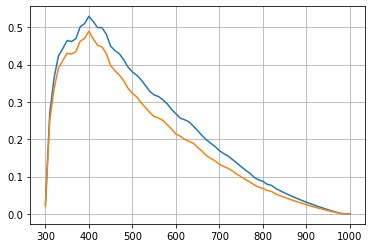

In [52]:
plt.plot(wl_fbk_25, pde_fbk_25)
plt.plot(wl_fbk_15, pde_fbk_15)
plt.grid()

In [329]:
nsb_hkb_borofloat_15*reflectivity*funnel*ff

0.026989600012870357

In [330]:
nsb_hkb_borofloat_8*reflectivity*funnel*ff

0.02051766074134599

In [331]:
nsb_hkb_pmma_15*reflectivity*funnel*ff

0.08571347581063839

In [332]:
nsb_hkb_pmma_8*reflectivity*funnel*ff

0.06830969084766976

In [333]:
i_hkb_pmma_15*reflectivity*funnel*ff

0.24986350977285912

In [334]:
i_hkb_pmma_8*reflectivity*funnel*ff

0.21614029345076485

In [335]:
i_hkb_borofloat_15*reflectivity*funnel*ff

0.16097796126892538

In [336]:
i_hkb_borofloat_8*reflectivity*funnel*ff

0.14156432064879795

In [365]:
i_pmt_pmma*reflectivity*funnel*ff

0.14671128695392996

In [338]:
nsb_pmt_pmma*reflectivity*funnel*ff

0.016060247309824888

In [401]:
nsb_hkb_pmma_5*reflectivity*funnel*ff

0.04832144104531326

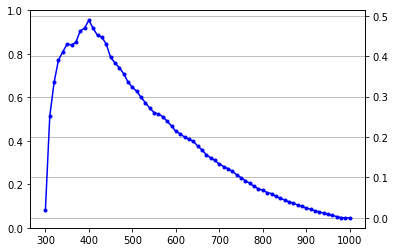

In [53]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(wl_cherenkov, transmissivity, 'green', label='Cherenkov')
#ax1.plot(wl_nsb, np.array(nsb)/300, '-r', label='NSB')

ax2.plot(wl_fbk_15, pde_fbk_15, '.b-', label='NUV-HD, @ Pxt = 15%')
ax2.grid(True)

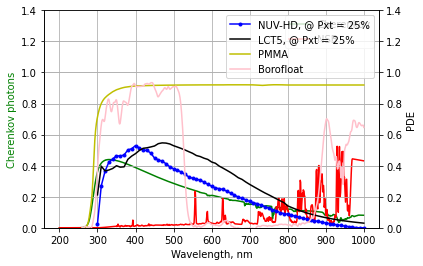

In [153]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(wl_cherenkov, transmissivity, 'green', label='Cherenkov')
ax1.plot(wl_nsb, np.array(nsb)/300, '-r', label='NSB')

ax2.plot(wl_fbk_25, pde_fbk_25, '.b-', label='NUV-HD, @ Pxt = 25%')
ax2.plot(wl_hkb_25, pde_hkb_25, 'black', label='LCT5, @ Pxt = 25%')
ax2.plot(wl_pmma, pmma, 'y-', label='PMMA')
ax2.plot(wl_borofloat, borofloat, 'pink', label='Borofloat')

ax1.set_xlabel('Wavelength, nm')
ax1.set_ylabel('Cherenkov photons', color='g')
ax2.set_ylabel('PDE', color='black')

ax1.set_ylim(0.0, 1.4)
ax2.set_ylim(0.0, 1.4)
ax1.grid(True)
ax2.grid(True)
leg = ax1.legend();
leg = ax2.legend();
plt.savefig('Spectrum.png')
plt.show()

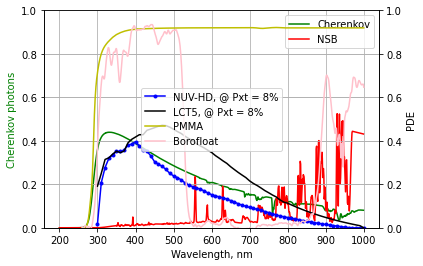

In [30]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(wl_cherenkov, transmissivity, 'green', label='Cherenkov')
ax1.plot(wl_nsb, np.array(nsb)/300, '-r', label='NSB')

ax2.plot(wl_fbk_8, pde_fbk_8, '.b-', label='NUV-HD, @ Pxt = 8%')
ax2.plot(wl_hkb_8, pde_hkb_8, 'black', label='LCT5, @ Pxt = 8%')
ax2.plot(wl_pmma, pmma, 'y-', label='PMMA')
ax2.plot(wl_borofloat, borofloat, 'pink', label='Borofloat')

ax1.set_xlabel('Wavelength, nm')
ax1.set_ylabel('Cherenkov photons', color='g')
ax2.set_ylabel('PDE', color='black')

ax1.set_ylim(0.0, 1.)
ax2.set_ylim(0.0, 1.)
ax1.grid(True)
ax2.grid(True)
leg = ax1.legend();
leg = ax2.legend();
#plt.savefig('Spectrum.png')
plt.show()

In [91]:
a = [27.02, 53.94, 81.08, 108.26]
b = [8508, 16800, 25101, 33395]

for i in range(len(a)):
    print(b[i]/a[i])

314.8778682457439
311.45717463848723
309.583127775037
308.470349159431


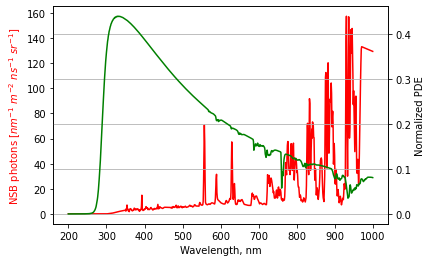

In [27]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax3 = ax1.twinx()
ax2.plot(wl_cherenkov, transmissivity, 'green', label='Cherenkov')
ax1.plot(wl_nsb, np.array(nsb), '-r', label='NSB')

#ax2.plot(wl_fbk_8, np.array(pde_fbk_8)/0.4, 'green', label='NUV-HD')
#ax2.plot(wl_hkb_8, np.array(pde_hkb_8)/0.475, 'blue', label='LCT5')
#ax2.plot(wl_borofloat, borofloat, '--', label='w/ filter')
#ax2.plot(wl_pmma, pmma, '--', label='w/o filter')

ax1.set_xlabel('Wavelength, nm')
ax1.set_ylabel(r'NSB photons [$nm^{-1} \ m^{-2} \ ns^{-1} \ sr^{-1}$]', color='r')
ax2.set_ylabel('Normalized PDE', color='black')

ax2.grid(True)

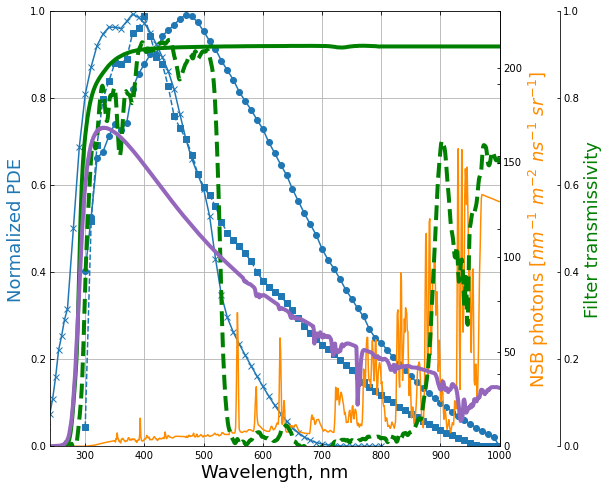

In [69]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
#plt.subplots(figsize=(12, 8))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel('Wavelength, nm',  fontsize=20)
host.set_ylabel("Normalized PDE", color = 'tab:blue',  fontsize=20)
#host.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]")
par1.set_ylabel(r'NSB photons [$nm^{-1} \ m^{-2} \ ns^{-1} \ sr^{-1}$]', color = 'tab:red')
par2.set_ylabel("Filter transmissivity", color='green')
par3.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]", color = 'tab:purple',)

p3, = par3.plot(wl_cherenkov, transmissivity, linewidth=4, color = 'tab:purple', label='Cherenkov')

p2, = par1.plot(wl_nsb, np.array(nsb), color = 'darkorange', label='NSB')
p3, = par2.plot(wl_pmma, pmma, color='green', linewidth=4, label='w/o filter')
p4, = par2.plot(wl_borofloat, borofloat, '--', color='green', linewidth=4, label='w/ filter')

p1, = host.plot(wl_fbk_8, np.array(pde_fbk_8)/0.4, '--s', color = 'tab:blue', label='NUV-HD')
p11, = host.plot(wl_hkb_8, np.array(pde_hkb_8)/0.475, '-o', color = 'tab:blue', label='LCT5')
p11, = host.plot(wl_pmt, np.array(qe_pmt)/0.43, 'x-', color = 'tab:blue', label='PMT')

#host.set_xscale('log')
#host.set_yscale('log')
#par1.set_xscale('log')
#par1.set_yscale('log')
#par2.set_xscale('log')
#par2.set_yscale('log')

host.set_xlim([240, 1000])
host.set_ylim([0., 1.])
par1.set_ylim([0, 230])
par2.set_ylim([0.0, 1.])
par3.set_ylim([0.0, 0.6])

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                    offset=(offset, 0))
par2.axis["right"].toggle(all=True)

#new_fixed_axis = par3.get_grid_helper().new_fixed_axis
#par3.axis["right"] = new_fixed_axis(loc="right", axes=par3,
#                                    offset=(2*offset, 0))
#par3.axis["right"].toggle(all=True)

#host.legend(loc=1,  fontsize=14)

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

par3.axis["right"].label.set_fontsize(18)
par2.axis["right"].label.set_fontsize(18)
par1.axis["right"].label.set_fontsize(18)
host.axis["left"].label.set_fontsize(18)
host.axis["bottom"].label.set_fontsize(18)

host.xaxis.set_tick_params(labelsize=20)
#host.xaxis.set_tick_params(fontsize=20)

host.tick_params(axis='x', labelsize=18)
#host.xticks(fontsize=16)

#ax = plt.gca()


host.grid()

plt.draw()
plt.show()

fig.savefig('Cherenkov_Eff.png')

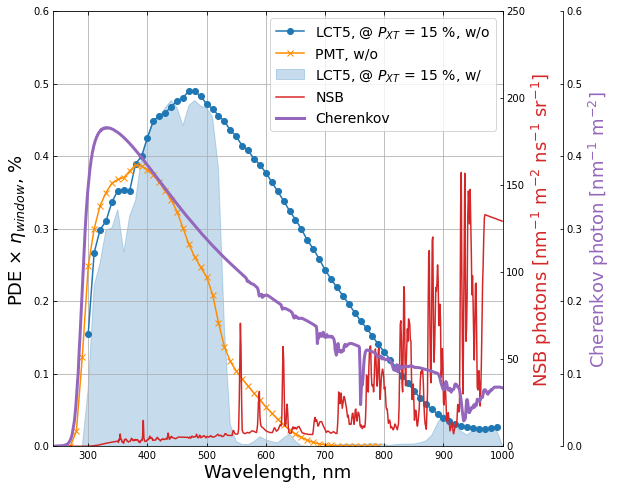

In [79]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
#plt.subplots(figsize=(12, 8))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel('Wavelength, nm',  fontsize=20)
host.set_ylabel(r"PDE $\times \ \eta_{window}$, %",  fontsize=20)
par1.set_ylabel(r'NSB photons [nm$^{-1}$ m$^{-2}$ ns$^{-1}$ sr$^{-1}$]', color = 'tab:red')
par3.set_ylabel(r"Cherenkov photon [nm$^{-1}$ m$^{-2}$]", color = 'tab:purple',)

p3, = par3.plot(wl_cherenkov, transmissivity, linewidth=3, color = 'tab:purple', label='Cherenkov')

p2, = par1.plot(wl_nsb, np.array(nsb), color = 'tab:red', label='NSB')

f_pde_fbk = interp1d(wl_fbk_25, pde_fbk_25, kind='cubic')
f_pde_hpk = interp1d(wl_hkb_15, pde_hkb_15, kind='cubic')
f_pde_hpk_75 = interp1d(wl_hkb_75_new, pde_hkb_75_new, kind='cubic')
f_pde_pmt = interp1d(wl_pmt, qe_pmt, kind='cubic')

f_borofloat = interp1d(wl_borofloat, borofloat, kind='cubic')
f_pmma = interp1d(wl_pmma, pmma, kind='cubic')

wl = np.arange(300, 1000, 10)
wl_new = np.arange(260, 1000, 10)
wl1 = np.arange(290, 1010, 10)
wl_inter_pmt = np.arange(270, 800, 10)

p12, = host.fill(wl1, f_pde_hpk(wl1)*f_borofloat(wl1), '-o', alpha=0.25, color = 'tab:blue', label=r'LCT5, @ $P_{XT}$ = 15 %, w/')
p11, = host.plot(wl, f_pde_hpk(wl)*f_pmma(wl), '-o', color = 'tab:blue', label=r'LCT5, @ $P_{XT}$ = 15 %, w/o')
#p11, = host.plot(wl_new, f_pde_hpk_75(wl_new)*f_pmma(wl_new), '-o', color = 'tab:cyan', label=r'LCT5 (new), 75x75 um$^2$, w/o')

p13, = host.plot(wl, f_pde_fbk(wl)*f_pmma(wl), '--s', color = 'tab:green', label=r'NUV-HD, @ $P_{XT}$ = 25 %, w/o')
#p14, = host.fill(wl, f_pde_fbk(wl)*f_borofloat(wl), '--s', alpha=0.45, color = 'tab:green', label=r'NUV-HD, @ $P_{XT}$ = 25 %, w/')
p15, = host.plot(wl_inter_pmt, f_pde_pmt(wl_inter_pmt)*f_pmma(wl_inter_pmt), 'x-', color = 'darkorange', label='PMT, w/o')


host.set_xlim([240, 1000])
host.set_ylim([0., 0.6])
par1.set_ylim([0, 250])
par2.set_ylim([0.0, 1.])
par3.set_ylim([0.0, 0.6])

offset = 60

new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3,
                                    offset=(offset, 0))
par3.axis["right"].toggle(all=True)

host.legend(loc=1,  fontsize=14)

par1.axis["right"].label.set_color(p2.get_color())
par3.axis["right"].label.set_fontsize(18)
par1.axis["right"].label.set_fontsize(18)
host.axis["left"].label.set_fontsize(18)
host.axis["bottom"].label.set_fontsize(18)

host.xaxis.set_tick_params(labelsize=20)

host.tick_params(axis='x', labelsize=18)



host.grid()

host.axis['right'].set_visible(False)
par2.axis['right'].set_visible(False)

plt.draw()
plt.show()

#fig.savefig('Cherenkov_no_Filter.png')

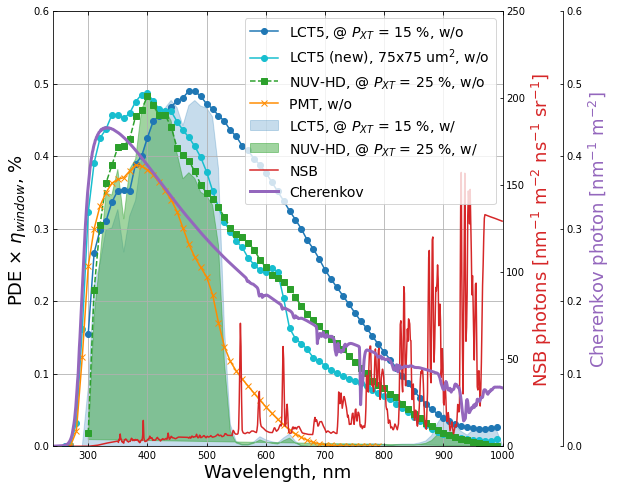

In [16]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
#plt.subplots(figsize=(12, 8))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel('Wavelength, nm',  fontsize=20)
host.set_ylabel(r"PDE $\times \ \eta_{window}$, %",  fontsize=20)
#host.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]")
par1.set_ylabel(r'NSB photons [nm$^{-1}$ m$^{-2}$ ns$^{-1}$ sr$^{-1}$]', color = 'tab:red')
#par2.set_ylabel("Filter transmissivity", color='green')
par3.set_ylabel(r"Cherenkov photon [nm$^{-1}$ m$^{-2}$]", color = 'tab:purple',)

p3, = par3.plot(wl_cherenkov, transmissivity, linewidth=3, color = 'tab:purple', label='Cherenkov')

p2, = par1.plot(wl_nsb, np.array(nsb), color = 'tab:red', label='NSB')
#p3, = par2.plot(wl_pmma, pmma, color='green', linewidth=4, label='w/o filter')
#p4, = par2.plot(wl_borofloat, borofloat, '--', color='green', linewidth=4, label='w/ filter')

f_pde_fbk = interp1d(wl_fbk_25, pde_fbk_25, kind='cubic')
f_pde_hpk = interp1d(wl_hkb_15, pde_hkb_15, kind='cubic')
f_pde_hpk_75 = interp1d(wl_hkb_75_new, pde_hkb_75_new, kind='cubic')
f_pde_pmt = interp1d(wl_pmt, qe_pmt, kind='cubic')

f_borofloat = interp1d(wl_borofloat, borofloat, kind='cubic')
f_pmma = interp1d(wl_pmma, pmma, kind='cubic')

wl = np.arange(300, 1000, 10)
wl_new = np.arange(260, 1000, 10)
wl1 = np.arange(290, 1010, 10)
wl_inter_pmt = np.arange(270, 800, 10)

#p1, = host.plot(wl, f_pde_fbk(wl), '--s', color = 'tab:green', label=r'NUV-HD @ $P_{XT}$ = 15 %, w/o')
#p12, = host.plot(wl, f_pde_hpk(wl), '-o', color = 'tab:blue', label=r'LCT5, @ $P_{XT}$ = 15 % w/o')
p12, = host.fill(wl1, f_pde_hpk(wl1)*f_borofloat(wl1), '-o', alpha=0.25, color = 'tab:blue', label=r'LCT5, @ $P_{XT}$ = 15 %, w/')

#plt.plot(wl_hkb_75_new, pde_hkb_75_new)

p11, = host.plot(wl, f_pde_hpk(wl)*f_pmma(wl), '-o', color = 'tab:blue', label=r'LCT5, @ $P_{XT}$ = 15 %, w/o')

p11, = host.plot(wl_new, f_pde_hpk_75(wl_new)*f_pmma(wl_new), '-o', color = 'tab:cyan', label=r'LCT5 (new), 75x75 um$^2$, w/o')

p13, = host.plot(wl, f_pde_fbk(wl)*f_pmma(wl), '--s', color = 'tab:green', label=r'NUV-HD, @ $P_{XT}$ = 25 %, w/o')
p14, = host.fill(wl, f_pde_fbk(wl)*f_borofloat(wl), '--s', alpha=0.45, color = 'tab:green', label=r'NUV-HD, @ $P_{XT}$ = 25 %, w/')
#p15, = host.plot(wl_inter_pmt, f_pmma(wl_inter_pmt)*f_pmma(wl_inter_pmt), 'x-', color = 'darkorange', label='PMT')
p15, = host.plot(wl_inter_pmt, f_pde_pmt(wl_inter_pmt)*f_pmma(wl_inter_pmt), 'x-', color = 'darkorange', label='PMT, w/o')



#host.set_xscale('log')
#host.set_yscale('log')
#par1.set_xscale('log')
#par1.set_yscale('log')
#par2.set_xscale('log')
#par2.set_yscale('log')

host.set_xlim([240, 1000])
host.set_ylim([0., 0.6])
par1.set_ylim([0, 250])
par2.set_ylim([0.0, 1.])
par3.set_ylim([0.0, 0.6])

offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis
#par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
#                                    offset=(offset, 0))
#par2.axis["right"].toggle(all=True)

new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3,
                                    offset=(offset, 0))
par3.axis["right"].toggle(all=True)

host.legend(loc=1,  fontsize=14)

#host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
#par2.axis["right"].label.set_color(p3.get_color())

par3.axis["right"].label.set_fontsize(18)
#par2.axis["right"].label.set_fontsize(18)
par1.axis["right"].label.set_fontsize(18)
host.axis["left"].label.set_fontsize(18)
host.axis["bottom"].label.set_fontsize(18)

host.xaxis.set_tick_params(labelsize=20)
#host.xaxis.set_tick_params(fontsize=20)

host.tick_params(axis='x', labelsize=18)
#host.xticks(fontsize=16)

#ax = plt.gca()


host.grid()

host.axis['right'].set_visible(False)
#par1.axis['right'].set_visible(False)
par2.axis['right'].set_visible(False)
#par3.axis['right'].set_visible(False)

plt.draw()
plt.show()

fig.savefig('Cherenkov_no_Filter.png')

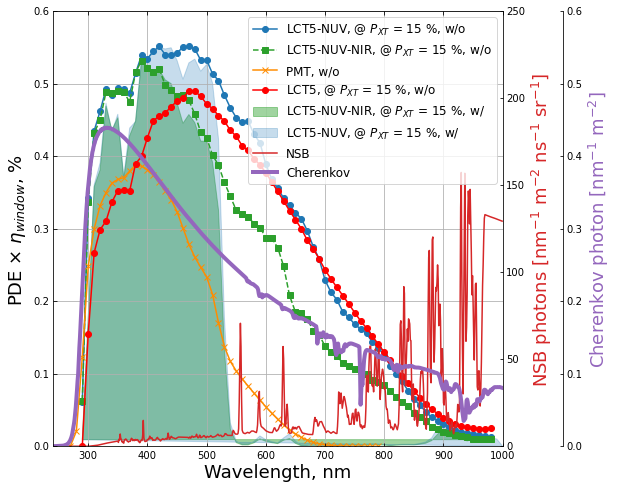

In [19]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
#plt.subplots(figsize=(12, 8))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel('Wavelength, nm',  fontsize=20)
host.set_ylabel(r"PDE $\times \ \eta_{window}$, %",  fontsize=20)
#host.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]")
par1.set_ylabel(r'NSB photons [nm$^{-1}$ m$^{-2}$ ns$^{-1}$ sr$^{-1}$]', color = 'tab:red')
#par2.set_ylabel("Filter transmissivity", color='green')
par3.set_ylabel(r"Cherenkov photon [nm$^{-1}$ m$^{-2}$]", color = 'tab:purple',)

p3, = par3.plot(wl_cherenkov, transmissivity, linewidth=4, color = 'tab:purple', label='Cherenkov')

p2, = par1.plot(wl_nsb, np.array(nsb), color = 'tab:red', label='NSB')
#p3, = par2.plot(wl_pmma, pmma, color='green', linewidth=4, label='w/o filter')
#p4, = par2.plot(wl_borofloat, borofloat, '--', color='green', linewidth=4, label='w/ filter')

f_pde_fbk = interp1d(wl_fbk_25, pde_fbk_25, kind='cubic')
f_pde_hpk = interp1d(wl_hkb_15, pde_hkb_15, kind='cubic')
f_pde_pmt = interp1d(wl_pmt, qe_pmt, kind='cubic')
f_pde_hph_nuv = interp1d(wl_hkb_15_nuv, pde_hkb_15_nuv, kind='cubic')
f_pde_hph_nuv_nir = interp1d(wl_hkb_15_nuv_nir, pde_hkb_15_nuv_nir, kind='cubic')

f_borofloat = interp1d(wl_borofloat, borofloat, kind='cubic')
f_pmma = interp1d(wl_pmma, pmma, kind='cubic')

wl = np.arange(290, 990, 10)
wl1 = np.arange(290, 1010, 10)
wl_inter_pmt = np.arange(270, 800, 10)

p14, = host.fill(wl, f_pde_hph_nuv_nir(wl)*f_borofloat(wl), '--s', alpha=0.45, color = 'tab:green', label=r'LCT5-NUV-NIR, @ $P_{XT}$ = 15 %, w/')
p12, = host.fill(wl1, f_pde_hph_nuv(wl1)*f_borofloat(wl1), '-o', alpha=0.25, color = 'tab:blue', label=r'LCT5-NUV, @ $P_{XT}$ = 15 %, w/')

p11, = host.plot(wl, f_pde_hph_nuv(wl)*f_pmma(wl), '-o', color = 'tab:blue', label=r'LCT5-NUV, @ $P_{XT}$ = 15 %, w/o')
p13, = host.plot(wl, f_pde_hph_nuv_nir(wl)*f_pmma(wl), '--s', color = 'tab:green', label=r'LCT5-NUV-NIR, @ $P_{XT}$ = 15 %, w/o')
p15, = host.plot(wl_inter_pmt, f_pde_pmt(wl_inter_pmt)*f_pmma(wl_inter_pmt), 'x-', color = 'darkorange', label='PMT, w/o')
p11, = host.plot(wl, f_pde_hpk(wl)*f_pmma(wl), '-o', color = 'red', label=r'LCT5, @ $P_{XT}$ = 15 %, w/o')

#host.set_xscale('log')
#host.set_yscale('log')
#par1.set_xscale('log')
#par1.set_yscale('log')
#par2.set_xscale('log')
#par2.set_yscale('log')

host.set_xlim([240, 1000])
host.set_ylim([0., 0.6])
par1.set_ylim([0, 250])
par2.set_ylim([0.0, 1.])
par3.set_ylim([0.0, 0.6])

offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis
#par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
#                                    offset=(offset, 0))
#par2.axis["right"].toggle(all=True)

new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3,
                                    offset=(offset, 0))
par3.axis["right"].toggle(all=True)

host.legend(loc=1,  fontsize=12)

#host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
#par2.axis["right"].label.set_color(p3.get_color())

par3.axis["right"].label.set_fontsize(18)
#par2.axis["right"].label.set_fontsize(18)
par1.axis["right"].label.set_fontsize(18)
host.axis["left"].label.set_fontsize(18)
host.axis["bottom"].label.set_fontsize(18)

host.xaxis.set_tick_params(labelsize=20)
#host.xaxis.set_tick_params(fontsize=20)

host.tick_params(axis='x', labelsize=18)
#host.xticks(fontsize=16)

#ax = plt.gca()


host.grid()

host.axis['right'].set_visible(False)
#par1.axis['right'].set_visible(False)
par2.axis['right'].set_visible(False)
#par3.axis['right'].set_visible(False)

plt.draw()
plt.show()

fig.savefig('Cherenkov_new_devices_2.png')

(0.0, 1.0)

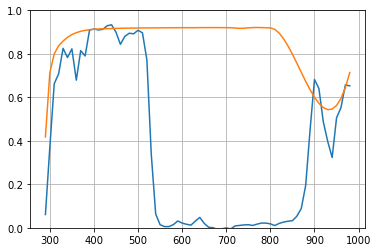

In [135]:
#f_borofloat = interp1d(wl_borofloat, borofloat, kind='cubic')
#f_pmma = interp1d(wl_pmma, pmma, kind='cubic')

plt.plot(wl, f_borofloat(wl))
plt.plot(wl, f_pmma(wl))
plt.grid()
plt.ylim([0, 1])

In [137]:
f_pmma(450)*60

55.020948780000005

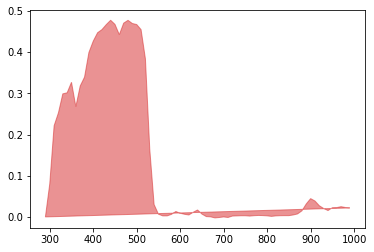

In [57]:
plt.fill(wl1, f_pde_hpk(wl1)*f_borofloat(wl1), '-o', alpha=0.5, color = 'tab:red', label=r'LCT5, @ $P_{XT}$ = 15 % w/')


In [48]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
#plt.subplots(figsize=(12, 8))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel('Wavelength, nm',  fontsize=20)
host.set_ylabel("Filter transmissivity", color='green',  fontsize=20)
#host.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]")
par1.set_ylabel(r'NSB photons [$nm^{-1} \ m^{-2} \ ns^{-1} \ sr^{-1}$]', color = 'tab:red')
#par2.set_ylabel("Filter transmissivity", color='green')
par3.set_ylabel(r"Cherenkov photon [$nm^{-1} \ m^{-2}$]", color = 'tab:purple',)

p3, = par3.plot(wl_cherenkov, transmissivity, linewidth=4, color = 'tab:purple', label='Cherenkov')

p2, = par1.plot(wl_nsb, np.array(nsb), color = 'darkorange', label='NSB')
p3, = par2.plot(wl_pmma, pmma, color='green', linewidth=4, label='w/o filter')
p4, = par2.plot(wl_borofloat, borofloat, '--', color='green', linewidth=4, label='w/ filter')

#p1, = host.plot(wl_fbk_8, np.array(pde_fbk_8)/0.4, '--s', color = 'tab:blue', label='NUV-HD')
#p11, = host.plot(wl_hkb_8, np.array(pde_hkb_8)/0.475, '-o', color = 'tab:blue', label='LCT5')
#p11, = host.plot(wl_pmt, np.array(qe_pmt)/0.43, 'x-', color = 'tab:blue', label='PMT')

#host.set_xscale('log')
#host.set_yscale('log')
#par1.set_xscale('log')
#par1.set_yscale('log')
#par2.set_xscale('log')
#par2.set_yscale('log')

host.set_xlim([240, 1000])
host.set_ylim([0., 1.])
par1.set_ylim([0, 230])
par2.set_ylim([0.0, 1.])
par3.set_ylim([0.0, 0.6])

offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis
#par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
#                                    offset=(offset, 0))
#par2.axis["right"].toggle(all=True)

new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3,
                                    offset=(offset, 0))
par3.axis["right"].toggle(all=True)

host.legend(loc=1,  fontsize=14)

#host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
#par2.axis["right"].label.set_color(p3.get_color())

par3.axis["right"].label.set_fontsize(18)
#par2.axis["right"].label.set_fontsize(18)
par1.axis["right"].label.set_fontsize(18)
host.axis["left"].label.set_fontsize(18)
host.axis["bottom"].label.set_fontsize(18)

host.xaxis.set_tick_params(labelsize=20)
#host.xaxis.set_tick_params(fontsize=20)

host.tick_params(axis='x', labelsize=18)
#host.xticks(fontsize=16)

#ax = plt.gca()


host.grid()

plt.draw()
plt.show()

fig.savefig('Cherenkov_Eff_np_PDE.png')

/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
No handles with labels found to put in legend.


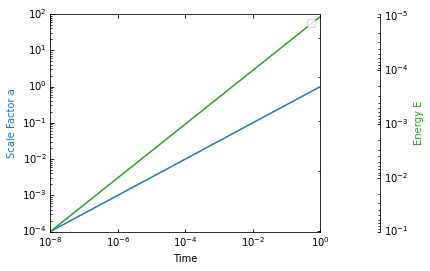

In [464]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

t_arr = np.linspace(-8,0,500)
t_arr = 10**t_arr
a_arr = [ti**(1./2) for ti in t_arr]
z_arr = [(1./ai - 1) for ai in a_arr]
T_arr = [1e-5*(1./ai) for ai in a_arr]

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"].toggle(all=True)

host.set_xlabel('Time')
host.set_ylabel("Scale Factor a")
par1.set_ylabel("Redshift z")
par2.set_ylabel("Energy E")

p1, = host.plot(t_arr, a_arr)
p2, = par1.plot(t_arr, z_arr)
p3, = par2.plot(t_arr, T_arr)

host.set_xscale('log')
host.set_yscale('log')
par1.set_xscale('log')
par1.set_yscale('log')
par2.set_xscale('log')
par2.set_yscale('log')

host.set_xlim([1e-8, 1])
host.set_ylim([1e-4, 1e2])
par1.set_ylim([9999,-0.99])
par2.set_ylim([0.1, 9e-6])

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

In [467]:
mm = ax.twinx()
yy = ax.twinx()

mm.set_ylabel('Monthly Hours')
yy.set_ylabel('Yearly Hours')

yy.spines["right"].set_position(("axes", 1.2))
yy.set_ylim(mm.get_ylim()[0]*12, mm.get_ylim()[1]*12)

(0.0, 12.0)

In [468]:
import pandas as pd


# --------------------------------------------------------------------------------------------------------
def plot(df, title):

    import matplotlib.pyplot as plt

    plt.style.use('mag')
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.75)

    mm = ax.twinx()
    yy = ax.twinx()
    for col in df.columns:
        mm.plot(df.index,df[[col]],label=col)
    mm.set_ylabel('Monthly Hours')
    yy.set_ylabel('Yearly Hours')
    yy.spines["right"].set_position(("axes", 1.2))
    yy.set_ylim(mm.get_ylim()[0]*12, mm.get_ylim()[1]*12)

    mm.tick_params(axis='y',labelsize=16) # set monthly labelsize (not global)

    # format
    ax.xaxis.grid(False)
    mm.yaxis.grid(False)
    yy.yaxis.grid(False)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.title(title, fontsize=16, x=.65, y=1.05)

    # format x-axis ticks as dates
    import matplotlib.dates as mdates
    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('\n%Y')
    moFmt = mdates.DateFormatter('%m') # (%b for Jan, Feb Mar; %m for 01 02 03)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_formatter(moFmt)
    for label in ax.xaxis.get_minorticklabels()[::2]: # show every other minor label
        label.set_visible(False)

    # turn off x-axis
    x_axis = ax.axes.get_xaxis()
    x_label = x_axis.get_label()
    x_label.set_visible(False)

    # turn-off left y-axis
    ax.yaxis.set_visible(False)

    # adjust fontsize
    plt.tick_params(axis='both', which='major', labelsize=16)

    handles, labels = mm.get_legend_handles_labels()
    mm.legend(fontsize=14, loc=6)

    plt.savefig('matplotlib-twin-axes.png', bbox_inches='tight', dpi=150)


def main():

    df = pd.read_excel('data.xlsx').set_index('Date')
    plot(df, title='Multi Y-Axis Scales')


if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'